In [1]:
import gensim
import numpy as np

In [4]:
embd_fls = ['tmp/{}_{}.txt'.format('darwin', 2), 'tmp/{}_{}.txt'.format('darwin', 3), 
            'tmp/{}_{}.txt'.format('darwin', 1), 'tmp/joyce.txt', 'tmp/joyce-dep.txt', 
            'tmp/foodreviews.txt', 'tmp/dickens.txt', 'tmp/law.txt', 'tmp/sherlock.txt', 
            'tmp/poetryengine.txt']
embd_names = [name[4:-4] for name in embd_fls]
embd_fls
embd_names

['darwin_2',
 'darwin_3',
 'darwin_1',
 'joyce',
 'joyce-dep',
 'foodreviews',
 'dickens',
 'law',
 'sherlock',
 'poetryengine']

In [5]:
embd_vecs = []
for fle in embd_fls:
    vec = gensim.models.KeyedVectors.load_word2vec_format(fle)
    embd_vecs.append(vec)
    print('.', end=' ')

. . . . . . . . . . 

In [6]:
# get top n words in embeddings
def get_topn_vocab(filepath, topn=1000):
    # Return set of first topn words in filepath embedding file.
    words = set()
    with open(filepath, 'r') as fle:
        fle.readline()
        count = 0
        for line in fle:
            count += 1
            if count > topn:
                break
            words.add(line.split(' ')[0])
    return words

get_topn_vocab(embd_fls[0], topn=10)

{'a', 'and', 'as', 'in', 'is', 'of', 'on', 'that', 'the', 'to'}

In [7]:
n = 100000
shared = get_topn_vocab(embd_fls[0], topn=n)
for fle in embd_fls[1:]:
    vocab = get_topn_vocab(fle, topn=n)
    shared = shared.intersection(vocab)

shared = list(shared)
sz = len(shared)
sz

2365

In [9]:
matrices = []
pips = []
for vec in embd_vecs:
    m = np.zeros((sz, len(vec['the'])))
    for i, word in enumerate(shared):
        v = vec.word_vec(word)
        m[i, :] = v / np.sqrt((np.sum(v**2)))
    matrices.append(m)
    pips.append(np.matmul(m, m.transpose()))

In [10]:
num = len(embd_fls)
piploss = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        if j > i:
            break
        piploss[i, j] = np.linalg.norm(pips[i] - pips[j])

np.set_printoptions(precision=0)
piploss

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [ 146.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [ 144.,  144.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [1723., 1722., 1721.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [1824., 1823., 1822.,  205.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [ 670.,  671.,  673., 2096., 2198.,    0.,    0.,    0.,    0.,
           0.],
       [ 584.,  584.,  587., 1876., 1982.,  506.,    0.,    0.,    0.,
           0.],
       [ 570.,  569.,  570., 1742., 1842.,  666.,  612.,    0.,    0.,
           0.],
       [1385., 1383., 1383.,  507.,  638., 1750., 1524., 1408.,    0.,
           0.],
       [1187., 1186., 1186.,  743.,  860., 1536., 1305., 1217.,  443.,
           0.]])

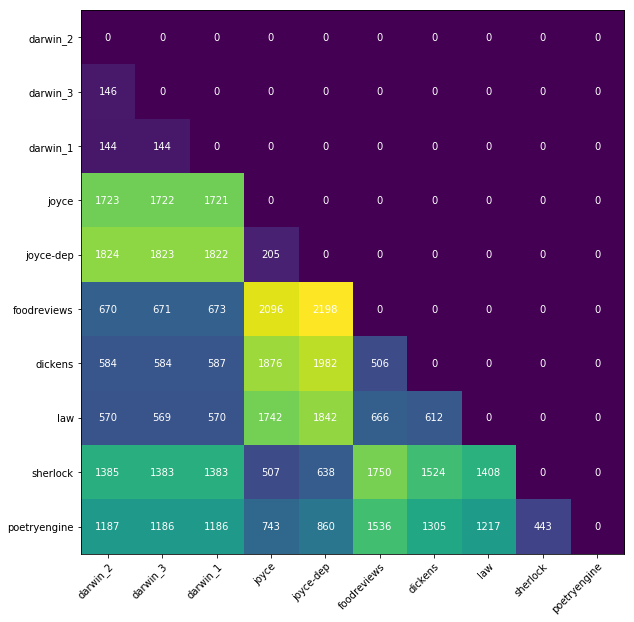

In [21]:
import matplotlib
import matplotlib.pyplot as plt

data = piploss

fig, ax = plt.subplots()
im = ax.imshow(data)

# We want to show all ticks...
ax.set_xticks(np.arange(len(embd_names)))
ax.set_yticks(np.arange(len(embd_names)))
# ... and label them with the respective list entries
ax.set_xticklabels(embd_names)
ax.set_yticklabels(embd_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(embd_names)):
    for j in range(len(embd_names)):
        text = ax.text(j, i, "{:.0f}".format(data[i, j]),
                       ha="center", va="center", color="w")

fig.set_size_inches(10, 10)

darwin_2
(200, 200)


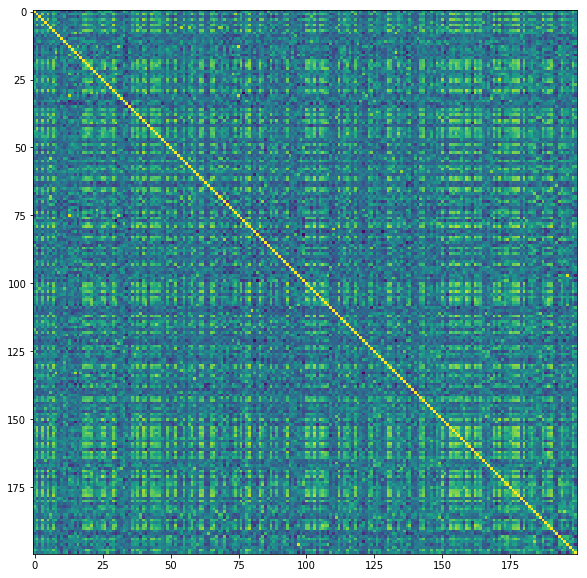

In [37]:
# data = piploss/1000
n = 1
print(embd_names[n])
data = pips[n]
# data = pips[0] - pips[4]
data = data[:200, :200]
print(data.shape)

fig, ax = plt.subplots()
im = ax.imshow(data)


fig.set_size_inches(10, 10)
# ax.set_title("Harvest of local farmers (in tons/year)")
# fig.tight_layout()
# plt.show()